<a href="https://colab.research.google.com/github/i40-Tools/I40KG-Embeddings/blob/master/Community-Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I40 standards landscape similarity analysis using embeddings

## Overview

In this notebook, we show the similarity analysis between Industry 4.0 Standards. 
To do so, we create embeddings about the Industry 4.0 Standards Knowledge Graph (I40KG) developed by [Grangel-Gonzales et. al.](https://www.researchgate.net/publication/318208930_The_Industry_40_Standards_Landscape_from_a_Semantic_Integration_Perspective)

The embeddings are located here: [I40 Embeddings](https://github.com/i40-Tools/I40KG-Embeddings/tree/master/logs_sto)

In [426]:
import scipy
import numpy as np
import pandas as pd
import json
from sklearn.metrics.pairwise import cosine_similarity

In [11]:
g = Graph()
#g.parse("sto/sto-enriched.nt", format="nt")
g.parse("sto/hasClassification/training_set_hasClassification.nt", format="nt")
    
len(g) # prints 2
    
qres = g.query(
    """PREFIX owl: <http://www.w3.org/2002/07/owl#>
       PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
       PREFIX sto: <https://w3id.org/i40/sto#>
    
    select ?s where {
            ?s rdf:type sto:Standard .
    } limit 1000""")
sub = []
for row in qres:
    sub.append(str("%s" %row['s']))
len(sub)

322

### In this section we show the analysis of similarity among standards belonging to the same framework

In [556]:
import json
from rdflib import Graph
SIMETRIC_MATRIX_FILE = "simetric_matrix.tsv"
ENTITIES_FILE = "entities.txt"
list_sim = []
output='result/TransH/'

g = Graph()
#g.parse("sto/sto-enriched.nt", format="nt")
g.parse("sto/relatedTo/training_set_relatedTo.nt", format="nt")
    
len(g) # prints 2
    
qres = g.query(
    """PREFIX owl: <http://www.w3.org/2002/07/owl#>
       PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
       PREFIX sto: <https://w3id.org/i40/sto#>
    
    select distinct ?s where {
            ?s ?p ?o .
    }""")

      
#with open("embeddings/TransE/entities_to_embeddings.json",'rb') as f:
with open("sto/relatedTo/embeddings/TransH/entities_to_embeddings.json",'rb') as f:
#with open("sto/hasClassification/embeddings/TransR/entities_to_embeddings.json",'rb') as f:
    array = json.load(f)
new_dict = {}
for row in qres:
    for key,value in array.items():
        if key == "%s" % row:
            tem = key
            #print(key)
            new_dict[tem] = array[key]


with open('output_standard_same_framework.json','w') as f:
    # this would place the entire output on one line
    # use json.dump(lista_items, f, indent=4) to "pretty-print" with four spaces per indent
    json.dump(new_dict, f) 

    
#to read the file containing standards/frameworks along with their embeddings   
with open('output_standard_same_framework.json', 'r') as f:
    array = json.load(f)

### Create standard/framework list

In [557]:
list_n = [*array]
entities = "\n".join(str(x) for x in list_n)
n_ent = str(len(list_n))
entity = open(output+'semep/'+ENTITIES_FILE, mode="w+")
entity.write(n_ent+"\n"+entities)
entity.close()
print(len([*array]))

247


### Compare each standard/framework with all the other standards/frameworks to build cosine similarity matrix

In [558]:
result = {}
s=n_ent+"\n"
cosine_matrix = pd.DataFrame(index=list(array.keys()), columns=list(array.keys()))
cosine_matrix = cosine_matrix.fillna(0.0)
for key,value in array.items():
    for keyC,valueC in array.items():
        sim = abs(1-scipy.spatial.distance.cosine(value,valueC)) #send the values of the standards/frameworks to cosine similarity function
        sim = round(sim, 5)
        list_sim.append(sim)
        cosine_matrix.at[key, keyC] = sim

threshold = np.percentile(list_sim, 85)
print("percentil", threshold)
for col in cosine_matrix.columns:
    cosine_matrix.loc[cosine_matrix[col] < threshold, [col]] = 0
cosine_matrix.head()

percentil 0.99984


,https://w3id.org/i40/sto#IEC_61360,https://w3id.org/i40/sto#IEC_60870_P5_S2_E1,https://w3id.org/i40/sto#IEC_61850_P7_S2_E2,https://w3id.org/i40/sto#DIN_EN_ISO_IEC_17025,https://w3id.org/i40/sto#MathML,https://w3id.org/i40/sto#SCOR,https://w3id.org/i40/sto#IEC_61158,https://w3id.org/i40/sto#ISO_19439,https://w3id.org/i40/sto#ISO_19440,https://w3id.org/i40/sto#RFC_6750,...,https://w3id.org/i40/sto#RFC_7643,https://w3id.org/i40/sto#ISO_20140_5,https://w3id.org/i40/sto#IEC_61968_P6_E1,https://w3id.org/i40/sto#IEC_61010_P2_S202_E1,https://w3id.org/i40/sto#ETSI_LTN,https://w3id.org/i40/sto#RFC_7642,https://w3id.org/i40/sto#W3C_SPARQL,https://w3id.org/i40/sto#IEC_61400_P25_S2_E2,https://w3id.org/i40/sto#IEC_60864_P1_E1,https://w3id.org/i40/sto#IEC_60381_P1_E2
https://w3id.org/i40/sto#IEC_61360,1.00000,0.0,0.99992,0.00000,0.99986,0.00000,0.00000,0.99984,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
https://w3id.org/i40/sto#IEC_60870_P5_S2_E1,0.00000,1.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
https://w3id.org/i40/sto#IEC_61850_P7_S2_E2,0.99992,0.0,1.00000,0.99986,0.99988,0.00000,0.00000,0.99984,0.99988,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
https://w3id.org/i40/sto#DIN_EN_ISO_IEC_17025,0.00000,0.0,0.99986,1.00000,0.99984,0.00000,0.00000,0.00000,0.99989,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
https://w3id.org/i40/sto#MathML,0.99986,0.0,0.99988,0.99984,1.00000,0.99986,0.99986,0.99984,0.99988,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [529]:
cosine_matrix.shape

(247, 247)

### Save cosine similarity matrix with the structure SemEP need

In [530]:
f = open(output+'semep/'+'matrix_undirected_cosine.tsv', mode="w+")
f.write(str(cosine_matrix.shape[0])+"\n")
f.close()
cosine_matrix.to_csv(output+'semep/'+'matrix_undirected_cosine.tsv', mode='a', sep=' ',
                     index=False, header=False, float_format='%.5f')

In [ ]:
# Run SemEP from Doker (https://hub.docker.com/r/kemele/semepnode) OR (https://github.com/SDM-TIB/SemEP-Node)
#!sudo docker run -it --rm -v /media/rivas/Data1/Data-mining/KCAP-I40KG-Embeddings/I40KG-Embeddings/result/TransD/semep:/data kemele/semepnode:23-05-2018 semEP-node entities.txt matrix_undirected_cosine.tsv 0.20612

In [531]:
num_cls = 35

### METIS Undirected MAX based similarity graph file

In [532]:
metislines = []
nodes = {"name":[], "id":[]}
kv = 1
edges = 0
for i, row in cosine_matrix.iterrows():
    val = ""
    ix = 1
    ledges = 0
    found = False
    for k in row.keys():
        if i != k and row[k] > 0:
            val += str(ix) + " " + str(int(row[k] * 100000)) + " "
            # Only one edge is counted between two nodes, i.e., (u,v) and (v, u) edges are counted as one
            # Self links are also ignored, Notive ix>kv
            #if ix > kv:
            ledges += 1
            found = True
        ix += 1
    if found:
        # This node is connected
        metislines.append(val.strip())
        edges += ledges
        nodes["name"].append(i)
        nodes['id'].append(str(kv))
    else:
        # disconnected RDF-MTs are given 10^6 value as similarity value
        metislines.append(str(kv) + " 100000")
        edges += 1
        #---------
        nodes["name"].append(i)
        nodes['id'].append(str(kv))
        print(i)
        print(str(kv))
    
    kv += 1    
nodes = pd.DataFrame(nodes)
print(edges)
nodes.head()

https://w3id.org/i40/sto#IEC_61334
212
https://w3id.org/i40/sto#IEC_61968_P4_E1
219
8908


,name,id
0,https://w3id.org/i40/sto#ISO_9000,1
1,https://w3id.org/i40/sto#NIST_500-293,2
2,https://w3id.org/i40/sto#ISO_15408,3
3,https://w3id.org/i40/sto#IEC_61810_P7_E2,4
4,https://w3id.org/i40/sto#ISO_13849,5


In [533]:
edges

8908

In [534]:
numedges = edges//2
numedges

4454

### Save filemetis.graph to execute METIS algorithm

In [535]:
#!mkdir result/metis
ff = open(output+'metis/metis.graph', 'w+')
ff.write(str(cosine_matrix.shape[0])+" "+ str(numedges) + " 001\n")
met = [m.strip() + "\n" for m in metislines]
ff.writelines(met)
ff.close()

In [14]:
#nodes.to_csv(output+'metis/METIS_NODE-CODES.tsv', sep='\t', index=False)

In [ ]:
#Run METIS from Doker: https://hub.docker.com/r/kemele/metis
#!sudo docker run -it --rm -v /media/rivas/Data1/Data-mining/KCAP-I40KG-Embeddings/I40KG-Embeddings/result/TransD/metis:/data kemele/metis:5.1.0 gpmetis metis.graph 2

### Read results standards of 10 Partitions by METIS algorithm

In [536]:
parts = open(output+'metis/metis.graph.part.'+str(num_cls)).readlines()
parts = [p.strip() for p in parts]
print(parts)
len(parts)

['15', '33', '34', '26', '27', '7', '25', '10', '24', '5', '8', '17', '9', '28', '33', '4', '14', '22', '33', '25', '14', '33', '19', '21', '27', '0', '30', '0', '19', '28', '3', '13', '27', '6', '23', '17', '17', '15', '10', '12', '28', '32', '24', '19', '17', '24', '20', '29', '17', '0', '6', '1', '3', '34', '26', '31', '23', '0', '20', '10', '0', '30', '19', '18', '26', '31', '10', '15', '16', '34', '10', '16', '4', '30', '6', '22', '21', '33', '27', '16', '25', '18', '18', '11', '30', '17', '12', '21', '22', '25', '22', '2', '34', '4', '26', '26', '10', '16', '29', '5', '13', '27', '3', '22', '3', '32', '2', '3', '29', '14', '25', '1', '11', '23', '7', '32', '3', '25', '21', '20', '8', '25', '14', '27', '17', '30', '29', '10', '23', '12', '13', '7', '29', '21', '6', '16', '32', '4', '29', '14', '15', '30', '18', '9', '19', '2', '34', '7', '9', '28', '13', '20', '21', '13', '27', '11', '32', '33', '15', '15', '30', '22', '9', '0', '18', '21', '20', '8', '11', '20', '9', '23', '12', 

247

### Save each partition standads into a file

In [537]:
i = 0
#partitions = {"0":[], "1":[], "2":[], "3":[], "4":[], "5":[], "6":[], "7":[], "8":[], "9":[], "10":[], "11":[], "12":[], "13":[], "14":[], "15":[], "16":[], "17":[]}
partitions = dict((str(k), []) for k in range(num_cls))
for p in parts:
    name = nodes.iat[i, 0]
    i +=1
    partitions[str(p)].append(name)
    
#f = open(output+'metis/metis_10_standards.graph.json', "w+")
#json.dump(partitions, f)
#f.close()
partitions

{'0': ['https://w3id.org/i40/sto#IEC_29100',
  'https://w3id.org/i40/sto#ISO_19770',
  'https://w3id.org/i40/sto#RFC_2818',
  'https://w3id.org/i40/sto#IEC_61968_P3_E2',
  'https://w3id.org/i40/sto#DIN_EN_50159',
  'https://w3id.org/i40/sto#IEC_62794',
  'https://w3id.org/i40/sto#ISO_15531-2x'],
 '1': ['https://w3id.org/i40/sto#ENISA_CloudComputing',
  'https://w3id.org/i40/sto#IEC_61804_P4',
  'https://w3id.org/i40/sto#ISO_15531',
  'https://w3id.org/i40/sto#IEC_61334_P3_S21_E1',
  'https://w3id.org/i40/sto#IEC_61400_P25_S2_E2',
  'https://w3id.org/i40/sto#RFC_7642',
  'https://w3id.org/i40/sto#IEC_61010_P2_S201_E2'],
 '2': ['https://w3id.org/i40/sto#IEC_61810_P2_E3',
  'https://w3id.org/i40/sto#DIN_EN_50129',
  'https://w3id.org/i40/sto#IEC_61131',
  'https://w3id.org/i40/sto#IEC_61310_P1_E2',
  'https://w3id.org/i40/sto#IEC_61334_P4_S33_E1',
  'https://w3id.org/i40/sto#IEC_61334_P4_S512_E1',
  'https://w3id.org/i40/sto#IEC_61334_P4_S1_E1'],
 '3': ['https://w3id.org/i40/sto#ISO_27017

In [538]:
i = 0
count = 0
#!mkdir result/metis/clusters
for p in partitions:
    if len(partitions[p]) == 0:
        continue
    count += len(partitions[p])
    f = open(output+'metis/clusters/cluster-' + str(i) + '.txt', 'w+')
    [f.write(l+'\n') for l in partitions[p]]
    f.close()
    i+=1
print(count)

247


## K-means Analyse 

In [539]:
vectors = []
for key,value in array.items():
    vectors.append(value)
X = np.array(vectors)

In [540]:
X[0]

array([-0.15753119, -0.04781141,  0.08049534,  0.21209241,  0.15531582,
       -0.02281322,  0.1739995 , -0.19806638, -0.06310377, -0.09504577,
       -0.16449314, -0.17934397,  0.14246333,  0.02164927, -0.11165165,
       -0.22002172, -0.03446097,  0.12980036, -0.09893984,  0.19084913,
        0.19861673, -0.26674199,  0.16718364,  0.12611285, -0.11034286,
        0.1262721 ,  0.29062641,  0.17148454,  0.10013318, -0.15828833,
        0.16027263,  0.00581692,  0.06027217,  0.07455251,  0.15614758,
       -0.01012354, -0.02380578, -0.08198921, -0.05373772, -0.08548391,
        0.08322453, -0.14681946,  0.04218426,  0.11417616, -0.01597854,
        0.12916316, -0.14679335, -0.09577038,  0.01828313, -0.22190529])

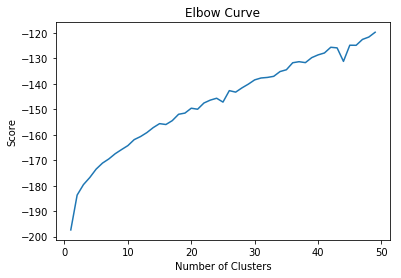

In [541]:
#X=cosine_matrix
Nc = range(1, 50)
kmeans = [KMeans(n_clusters=i) for i in Nc]
#print(kmeans)
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
plt.plot(Nc, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

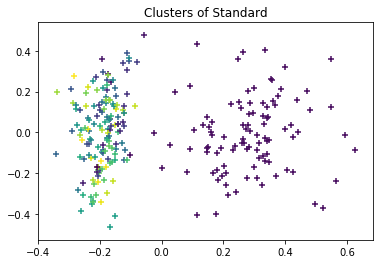

In [542]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

pca = PCA(n_components=2).fit(X)
pca_c = pca.transform(X)
#kmeans = KMeans(n_clusters=7, random_state=0).fit(X)
kmeans = KMeans(n_clusters=num_cls, random_state=0).fit(cosine_matrix)

plt.scatter(pca_c[:, 0], pca_c[:, 1], c=kmeans.labels_, marker='+')
plt.title("Clusters of Standard")

plt.show()

### Number of standard by clsuter

In [543]:
pd.value_counts(kmeans.labels_, 0)

0       2
1     100
2       3
3       3
4       4
5       6
6       9
7       3
8       4
9       5
10      4
11      3
12      3
13      4
14      7
15      2
16      6
17      3
18      7
19      7
20      4
21      4
22      3
23      4
24      3
25      8
26      4
27      3
28      3
29      4
30      5
31      7
32      3
33      4
34      3
dtype: int64

### Save each partition standads into a file

In [544]:
list_cluster = pd.DataFrame()
list_cluster.insert(0, 'standards', list_n)
list_cluster.insert(1, 'clusters', kmeans.labels_)
#list_cluster = list_cluster.sort_values(by=['clusters'], ascending=False)

In [545]:
list_cluster.head()

,standards,clusters
0,https://w3id.org/i40/sto#ISO_9000,6
1,https://w3id.org/i40/sto#NIST_500-293,19
2,https://w3id.org/i40/sto#ISO_15408,26
3,https://w3id.org/i40/sto#IEC_61810_P7_E2,7
4,https://w3id.org/i40/sto#ISO_13849,32


In [546]:
#!mkdir result/Kmeans
#!mkdir result/Kmeans/cluster
cls_0 = list_cluster.loc[list_cluster['clusters'] == 0]
cls_1 = list_cluster.loc[list_cluster['clusters'] == 1]
cls_2 = list_cluster.loc[list_cluster['clusters'] == 2]
cls_3 = list_cluster.loc[list_cluster['clusters'] == 3]
cls_4 = list_cluster.loc[list_cluster['clusters'] == 4]
cls_5 = list_cluster.loc[list_cluster['clusters'] == 5]
cls_6 = list_cluster.loc[list_cluster['clusters'] == 6]
cls_7 = list_cluster.loc[list_cluster['clusters'] == 7]
cls_8 = list_cluster.loc[list_cluster['clusters'] == 8]
cls_9 = list_cluster.loc[list_cluster['clusters'] == 9]
cls_10 = list_cluster.loc[list_cluster['clusters'] == 10]
cls_11 = list_cluster.loc[list_cluster['clusters'] == 11]
cls_12 = list_cluster.loc[list_cluster['clusters'] == 12]
cls_13 = list_cluster.loc[list_cluster['clusters'] == 13]
cls_14 = list_cluster.loc[list_cluster['clusters'] == 14]
cls_15 = list_cluster.loc[list_cluster['clusters'] == 15]
cls_16 = list_cluster.loc[list_cluster['clusters'] == 16]
cls_17 = list_cluster.loc[list_cluster['clusters'] == 17]
cls_18 = list_cluster.loc[list_cluster['clusters'] == 18]
cls_19 = list_cluster.loc[list_cluster['clusters'] == 19]
cls_20 = list_cluster.loc[list_cluster['clusters'] == 20]
cls_21 = list_cluster.loc[list_cluster['clusters'] == 21]
cls_22 = list_cluster.loc[list_cluster['clusters'] == 22]
cls_23 = list_cluster.loc[list_cluster['clusters'] == 23]
cls_24 = list_cluster.loc[list_cluster['clusters'] == 24]
cls_25 = list_cluster.loc[list_cluster['clusters'] == 25]
cls_26 = list_cluster.loc[list_cluster['clusters'] == 26]
cls_27 = list_cluster.loc[list_cluster['clusters'] == 27]
cls_28 = list_cluster.loc[list_cluster['clusters'] == 28]
cls_29 = list_cluster.loc[list_cluster['clusters'] == 29]
cls_30 = list_cluster.loc[list_cluster['clusters'] == 30]
cls_31 = list_cluster.loc[list_cluster['clusters'] == 31]
cls_32 = list_cluster.loc[list_cluster['clusters'] == 32]
cls_33 = list_cluster.loc[list_cluster['clusters'] == 33]
cls_34 = list_cluster.loc[list_cluster['clusters'] == 34]
"""
cls_35 = list_cluster.loc[list_cluster['clusters'] == 35]
cls_36 = list_cluster.loc[list_cluster['clusters'] == 36]
cls_37 = list_cluster.loc[list_cluster['clusters'] == 37]
cls_38 = list_cluster.loc[list_cluster['clusters'] == 38]
cls_39 = list_cluster.loc[list_cluster['clusters'] == 39]
cls_40 = list_cluster.loc[list_cluster['clusters'] == 40]
cls_41 = list_cluster.loc[list_cluster['clusters'] == 41]
cls_42 = list_cluster.loc[list_cluster['clusters'] == 42]
cls_43 = list_cluster.loc[list_cluster['clusters'] == 43]
cls_44 = list_cluster.loc[list_cluster['clusters'] == 44]
cls_45 = list_cluster.loc[list_cluster['clusters'] == 45]
cls_46 = list_cluster.loc[list_cluster['clusters'] == 46]
cls_47 = list_cluster.loc[list_cluster['clusters'] == 47]
cls_48 = list_cluster.loc[list_cluster['clusters'] == 48]
cls_49 = list_cluster.loc[list_cluster['clusters'] == 49]
cls_50 = list_cluster.loc[list_cluster['clusters'] == 50]
cls_51 = list_cluster.loc[list_cluster['clusters'] == 51]
cls_52 = list_cluster.loc[list_cluster['clusters'] == 52]
"""

cls_0['standards'].to_csv(output+'Kmeans/clusters/cluster-0.txt', index=False)
cls_1['standards'].to_csv(output+'Kmeans/clusters/cluster-1.txt', index=False)
cls_2['standards'].to_csv(output+'Kmeans/clusters/cluster-2.txt', index=False)
cls_3['standards'].to_csv(output+'Kmeans/clusters/cluster-3.txt', index=False)
cls_4['standards'].to_csv(output+'Kmeans/clusters/cluster-4.txt', index=False)
cls_5['standards'].to_csv(output+'Kmeans/clusters/cluster-5.txt', index=False)
cls_6['standards'].to_csv(output+'Kmeans/clusters/cluster-6.txt', index=False)
cls_7['standards'].to_csv(output+'Kmeans/clusters/cluster-7.txt', index=False)
cls_8['standards'].to_csv(output+'Kmeans/clusters/cluster-8.txt', index=False)
cls_9['standards'].to_csv(output+'Kmeans/clusters/cluster-9.txt', index=False)
cls_10['standards'].to_csv(output+'Kmeans/clusters/cluster-10.txt', index=False)
cls_11['standards'].to_csv(output+'Kmeans/clusters/cluster-11.txt', index=False)
cls_12['standards'].to_csv(output+'Kmeans/clusters/cluster-12.txt', index=False)
cls_13['standards'].to_csv(output+'Kmeans/clusters/cluster-13.txt', index=False)
cls_14['standards'].to_csv(output+'Kmeans/clusters/cluster-14.txt', index=False)
cls_15['standards'].to_csv(output+'Kmeans/clusters/cluster-15.txt', index=False)
cls_16['standards'].to_csv(output+'Kmeans/clusters/cluster-16.txt', index=False)
cls_17['standards'].to_csv(output+'Kmeans/clusters/cluster-17.txt', index=False)
cls_18['standards'].to_csv(output+'Kmeans/clusters/cluster-18.txt', index=False)
cls_19['standards'].to_csv(output+'Kmeans/clusters/cluster-19.txt', index=False)
cls_20['standards'].to_csv(output+'Kmeans/clusters/cluster-20.txt', index=False)
cls_21['standards'].to_csv(output+'Kmeans/clusters/cluster-21.txt', index=False)
cls_22['standards'].to_csv(output+'Kmeans/clusters/cluster-22.txt', index=False)
cls_23['standards'].to_csv(output+'Kmeans/clusters/cluster-23.txt', index=False)
cls_24['standards'].to_csv(output+'Kmeans/clusters/cluster-24.txt', index=False)
cls_25['standards'].to_csv(output+'Kmeans/clusters/cluster-25.txt', index=False)
cls_26['standards'].to_csv(output+'Kmeans/clusters/cluster-26.txt', index=False)
cls_27['standards'].to_csv(output+'Kmeans/clusters/cluster-27.txt', index=False)
cls_28['standards'].to_csv(output+'Kmeans/clusters/cluster-28.txt', index=False)
cls_29['standards'].to_csv(output+'Kmeans/clusters/cluster-29.txt', index=False)
cls_30['standards'].to_csv(output+'Kmeans/clusters/cluster-30.txt', index=False)
cls_31['standards'].to_csv(output+'Kmeans/clusters/cluster-31.txt', index=False)
cls_32['standards'].to_csv(output+'Kmeans/clusters/cluster-32.txt', index=False)
cls_33['standards'].to_csv(output+'Kmeans/clusters/cluster-33.txt', index=False)
cls_34['standards'].to_csv(output+'Kmeans/clusters/cluster-34.txt', index=False)
"""
cls_35['standards'].to_csv(output+'Kmeans/clusters/cluster-35.txt', index=False)
cls_36['standards'].to_csv(output+'Kmeans/clusters/cluster-36.txt', index=False)
cls_37['standards'].to_csv(output+'Kmeans/clusters/cluster-37.txt', index=False)
cls_38['standards'].to_csv(output+'Kmeans/clusters/cluster-38.txt', index=False)
cls_39['standards'].to_csv(output+'Kmeans/clusters/cluster-39.txt', index=False)
cls_40['standards'].to_csv(output+'Kmeans/clusters/cluster-40.txt', index=False)
cls_41['standards'].to_csv(output+'Kmeans/clusters/cluster-41.txt', index=False)
cls_42['standards'].to_csv(output+'Kmeans/clusters/cluster-42.txt', index=False)
cls_43['standards'].to_csv(output+'Kmeans/clusters/cluster-43.txt', index=False)
cls_44['standards'].to_csv(output+'Kmeans/clusters/cluster-44.txt', index=False)
cls_45['standards'].to_csv(output+'Kmeans/clusters/cluster-45.txt', index=False)
cls_46['standards'].to_csv(output+'Kmeans/clusters/cluster-46.txt', index=False)
cls_47['standards'].to_csv(output+'Kmeans/clusters/cluster-47.txt', index=False)
cls_48['standards'].to_csv(output+'Kmeans/clusters/cluster-48.txt', index=False)
cls_49['standards'].to_csv(output+'Kmeans/clusters/cluster-49.txt', index=False)
cls_50['standards'].to_csv(output+'Kmeans/clusters/cluster-50.txt', index=False)
cls_51['standards'].to_csv(output+'Kmeans/clusters/cluster-51.txt', index=False)
cls_52['standards'].to_csv(output+'Kmeans/clusters/cluster-52.txt', index=False)
"""

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:60: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:61: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:62: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.t

"\ncls_35['standards'].to_csv(output+'Kmeans/clusters/cluster-35.txt', index=False)\ncls_36['standards'].to_csv(output+'Kmeans/clusters/cluster-36.txt', index=False)\ncls_37['standards'].to_csv(output+'Kmeans/clusters/cluster-37.txt', index=False)\ncls_38['standards'].to_csv(output+'Kmeans/clusters/cluster-38.txt', index=False)\ncls_39['standards'].to_csv(output+'Kmeans/clusters/cluster-39.txt', index=False)\ncls_40['standards'].to_csv(output+'Kmeans/clusters/cluster-40.txt', index=False)\ncls_41['standards'].to_csv(output+'Kmeans/clusters/cluster-41.txt', index=False)\ncls_42['standards'].to_csv(output+'Kmeans/clusters/cluster-42.txt', index=False)\ncls_43['standards'].to_csv(output+'Kmeans/clusters/cluster-43.txt', index=False)\ncls_44['standards'].to_csv(output+'Kmeans/clusters/cluster-44.txt', index=False)\ncls_45['standards'].to_csv(output+'Kmeans/clusters/cluster-45.txt', index=False)\ncls_46['standards'].to_csv(output+'Kmeans/clusters/cluster-46.txt', index=False)\ncls_47['stand

### Density plot of standard similarity

In [559]:
#i=0
similarity=[]
#standard_similarity = pd.DataFrame(columns=['std_1', 'std_2', 'similarity'])
for key,value in array.items():
    for keyC,valueC in array.items():
        if key != keyC:
            sim = abs(1-scipy.spatial.distance.cosine(value,valueC)) #send the values of the standards/frameworks to cosine similarity function
            similarity.append(sim)
            #standard_similarity.loc[i]=[key, keyC, sim]
            #i+=1
standard_similarity = pd.DataFrame()
standard_similarity.insert(0, 'similarity', similarity)

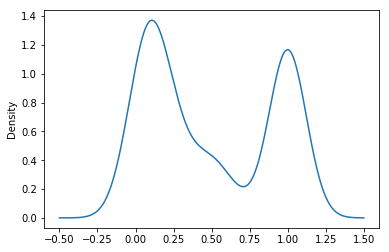

In [560]:
standard_similarity["similarity"].plot.kde(bw_method=0.3)

In [549]:
#Format required of the matrix to run clustering Measures
#!mkdir result/measures
cosine_matrix.to_csv(output+'measures/matrix_undirected_cosine.txt', mode='w+',
                     index=False, header=False, float_format='%.5f')
with open(output+'measures/'+ENTITIES_FILE, "w") as entity:
    entity.write(n_ent+"\n"+entities)

In [ ]:
#Run clustering Measures from: https://github.com/SDM-TIB/korona-graph-partitioning/tree/master/utils/clusteringMeasures
#!rivas@LXZ15265:/media/rivas/Data1/Data-mining/KCAP-I40KG-Embeddings/korona-graph-partitioning/utils/clusteringMeasures$ ./cma measures/clusters measures/entities.txt measures/matrix_undirected_cosine.txt

In [554]:
path = '../korona-graph-partitioning/utils/clusteringMeasures/'
cls_m = path + "output.txt"
measure = []
static = 16
n_metric = 5
cls_measures = pd.read_csv(cls_m, delimiter=",", header=None)
index_start = static + num_cls
index_end = index_start + n_metric
for pos in range(index_start, index_end):
    a = cls_measures.iloc[pos].to_string()
    b = a.split('\\t')[1]
    measure.append(float(b))
print(*[measure[0],measure[4], measure[3], measure[2], measure[1]], sep='\n')

0.926826591717
0.768999626272
1663.245459999996
0.056230296633
0.091233812259


In [555]:
#Transform these three metric to (Inv. Conductance, Norm.Modularity and Inv.Norm.Total Cut) for each algorithm

#conductance = 0.705256059271
#modularity = 0.166783425861
#total_cut = 1012.587679999999
#max_cut = sum(list_sim)

max_cut = sum(cosine_matrix.sum(axis = 0, skipna = True))

measure[0] = 1.0 - measure[0]
measure[2] = (measure[2] + 0.5)/1.5
measure[3] = 1-(measure[3]/max_cut)
alg = [measure[0],measure[4],measure[3],measure[2],measure[1]]
alg = [round(i * 10, 2) for i in alg]
print(alg)

[0.73, 7.69, 5.74, 3.71, 0.91]


In [401]:
cls_evaluation_TransD_th_85 = {'semep':[4.33, 5.93, 7.69, 3.9, 4.91],
                               'metis':[4.77, 6.63, 7.64, 4.29, 4.78],
                               'kmeans':[4.22, 5.65, 7.83, 4.04, 5.21]
                              }
cls_evaluation_TransD_th_90 = {'semep':[2.18, 8.32, 6.48, 3.83, 2.18],
                               'metis':[3.2, 8.42, 6.94, 4.51, 3.2],
                               'kmeans':[2.85, 7.57, 7.07, 4.19, 3.49]
                              }
cls_evaluation_TransD_th_95 = {'semep':[1.29, 9.56, 6.4, 4.01, 1.33],
                               'metis':[2.28, 9.61, 6.79, 4.65, 2.28],
                               'kmeans':[1.89, 9.42, 6.66, 4.37, 1.97]
                              }
cls_evaluation_TransE_th_85 = {'semep':[3.82, 6.83, 7.5, 4.17, 4.53],
                               'metis':[4.53, 7.43, 7.5, 4.64, 4.53],
                               'kmeans':[4.71, 6.58, 7.93, 4.74, 5.46]
                              }
cls_evaluation_TransE_th_90 = {'semep':[1.78, 9.11, 6.33, 4.11, 2.05],
                               'metis':[0.55, 9.2, 5.67, 3.45, 0.61],
                               'kmeans':[1.38, 8.02, 6.24, 4.14, 1.85]
                              }
cls_evaluation_TransE_th_95 = {'semep':[3.68, 9.6, 6.71, 4.52, 2.39],
                               'metis':[1.2, 9.66, 6.08, 3.81, 0.95],
                               'kmeans':[1.13, 7.89, 6.4, 4.17, 1.69]
                              }
cls_evaluation_TransH_th_85 = {'semep':[2.48, 8.36, 6.69, 4.3, 3.01],
                               'metis':[3.49, 8.7, 7.01, 4.98, 3.69],
                               'kmeans':[3.56, 7.93, 7.26, 5.07, 4.23]
                              }
cls_evaluation_TransH_th_90 = {'semep':[2.15, 9.16, 6.48, 4.43, 2.43],
                               'metis':[2.42, 9.26, 6.54, 4.62, 2.55],
                               'kmeans':[2.39, 8.59, 6.84, 4.91, 3.21]
                              }
cls_evaluation_TransH_th_95 = {'semep':[3.92, 9.6, 7.29, 5.29, 3.82],
                               'metis':[0.93, 9.64, 5.97, 3.71, 0.81],
                               'kmeans':[1.85, 8.71, 6.61, 4.57, 2.27]
                              }
cls_evaluation_TransR_th_85 = {'semep':[3.11, 8.99, 6.15, 3.86, 1.77],
                               'metis':[5.84, 5.13, 8.2, 4.06, 6.12],
                               'kmeans':[3.77, 3.2, 8.76, 3.8, 7.32]
                              }
cls_evaluation_TransR_th_90 = {'semep':[1.98, 8.56, 6.41, 3.91, 2.06],
                               'metis':[2.77, 8.7, 6.73, 4.44, 2.78],
                               'kmeans':[2.67, 8.1, 6.88, 4.34, 3.11]
                              }
cls_evaluation_TransR_th_95 = {'semep':[1.5, 9.55, 6.47, 4.16, 1.58],
                               'metis':[0.62, 9.13, 5.6, 3.54, 0.62],
                               'kmeans':[0.73, 7.69, 5.74, 3.71, 0.91]
                              }


### Cluster evaluation in terms of prediction metrics (hasClassification)

In [989]:
# Set data

cls_evaluation_TransD_th_85 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'C': [0.443, 0.588, 0.574],
'P': [0.462, 0.511, 0.507],
'T': [0.825, 0.816, 0.817],
'M': [0.380, 0.401, 0.402],
'Co': [0.621, 0.602, 0.605]
})

cls_evaluation_TransE_th_85 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'C': [0.373, 0.483, 0.380],
'P': [0.551, 0.663, 0.420],
'T': [0.778, 0.761, 0.837],
'M': [0.386, 0.433, 0.403],
'Co': [0.521, 0.485, 0.648]
})

cls_evaluation_TransH_th_85 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'C': [0.228, 0.308, 0.300],
'P': [0.828, 0.851, 0.763],
'T': [0.641, 0.683, 0.686],
'M': [0.399, 0.461, 0.454],
'Co': [0.238, 0.326, 0.332]
})

cls_evaluation_TransR_th_85 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'C': [0.413, 0.583, 0.458],
'P': [0.449, 0.511, 0.453],
'T': [0.826, 0.815, 0.838],
'M': [0.373, 0.401, 0.392],
'Co': [0.624, 0.602, 0.651]
})
#==========================================================================
cls_evaluation_TransD_th_90 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'C': [0.214, 0.314, 0.282],
'P': [0.832, 0.841, 0.805],
'T': [0.647, 0.691, 0.689],
'M': [0.380, 0.447, 0.423],
'Co': [0.216, 0.314, 0.310]
})

cls_evaluation_TransE_th_90 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'C': [0.194, 0.288, 0.278],
'P': [0.858, 0.872, 0.804],
'T': [0.640, 0.681, 0.690],
'M': [0.389, 0.454, 0.437],
'Co': [0.203, 0.295, 0.314]
})

cls_evaluation_TransH_th_90 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'C': [0.197, 0.218, 0.207],
'P': [0.908, 0.921, 0.823],
'T': [0.647, 0.646, 0.667],
'M': [0.431, 0.444, 0.451],
'Co': [0.232, 0.229, 0.275]
})

cls_evaluation_TransR_th_90 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'C': [0.193, 0.293, 0.271],
'P': [0.842, 0.858, 0.831],
'T': [0.637, 0.681, 0.681],
'M': [0.376, 0.445, 0.43],
'Co': [0.196, 0.293, 0.293]
})
#======================================================================

cls_evaluation_TransD_th_95 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'C': [0.103, 0.092, 0.194],
'P': [0.956, 0.957, 0.950],
'T': [0.626, 0.622, 0.666],
'M': [0.380, 0.375, 0.441],
'Co': [0.101, 0.092, 0.198]
})

cls_evaluation_TransE_th_95 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'C': [0.126, 0.087, 0.192],
'P': [0.958, 0.958, 0.952],
'T': [0.638, 0.618, 0.665],
'M': [0.403, 0.373, 0.444],
'Co': [0.137, 0.087, 0.201]
})

cls_evaluation_TransH_th_95 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'C': [0.27, 0.115, 0.18],
'P': [0.957, 0.961, 0.85],
'T': [0.701, 0.617, 0.674],
'M': [0.496, 0.389, 0.452],
'Co': [0.307, 0.112, 0.244]
})

cls_evaluation_TransR_th_95 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'C': [0.125, 0.092, 0.197],
'P': [0.956, 0.957, 0.951],
'T': [0.637, 0.621, 0.667],
'M': [0.399, 0.375, 0.444],
'Co': [0.131, 0.092, 0.202]
})

### Cluster evaluation in terms of prediction metrics (relatedTo)

In [406]:
# Set data

cls_evaluation_TransD_th_85 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.415, 0.592, 0.413],
'Inv. Performance': [0.451, 0.512, 0.404],
'Inv. Norm.Total Cut': [0.824, 0.817, 0.853],
'Norm.Modularity': [0.372, 0.403, 0.385],
'Coverage': [0.620, 0.605, 0.682]
})

cls_evaluation_TransE_th_85 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.553, 0.595, 0.349],
'Inv. Performance': [0.505, 0.513, 0.267],
'Inv. Norm.Total Cut': [0.806, 0.821, 0.902],
'Norm.Modularity': [0.387, 0.409, 0.374],
'Coverage': [0.583, 0.615, 0.790]
})

cls_evaluation_TransH_th_85 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.277, 0.333, 0.329],
'Inv. Performance': [0.805, 0.836, 0.709],
'Inv. Norm.Total Cut': [0.670, 0.694, 0.694],
'Norm.Modularity': [0.417, 0.465, 0.447],
'Coverage': [0.297, 0.350, 0.350]
})

cls_evaluation_TransR_th_85 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.42, 0.585, 0.502],
'Inv. Performance': [0.459, 0.511, 0.477],
'Inv. Norm.Total Cut': [0.823, 0.816, 0.826],
'Norm.Modularity': [0.373, 0.402, 0.397],
'Coverage': [0.619, 0.603, 0.626]
})
#==========================================================================
cls_evaluation_TransD_th_90 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.219, 0.311, 0.282],
'Inv. Performance': [0.831, 0.841, 0.745],
'Inv. Norm.Total Cut': [0.649, 0.690, 0.714],
'Norm.Modularity': [0.383, 0.446, 0.417],
'Coverage': [0.221, 0.312, 0.365]
})

cls_evaluation_TransE_th_90 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.201, 0.275, 0.280],
'Inv. Performance': [0.862, 0.870, 0.820],
'Inv. Norm.Total Cut': [0.640, 0.674, 0.687],
'Norm.Modularity': [0.394, 0.444, 0.437],
'Coverage': [0.204, 0.278, 0.307]
})

cls_evaluation_TransH_th_90 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.176, 0.211, 0.194],
'Inv. Performance': [0.909, 0.921, 0.833],
'Inv. Norm.Total Cut': [0.639, 0.642, 0.667],
'Norm.Modularity': [0.422, 0.439, 0.456],
'Coverage': [0.214, 0.220, 0.275]
})

cls_evaluation_TransR_th_90 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.212, 0.318, 0.282],
'Inv. Performance': [0.832, 0.842, 0.797],
'Inv. Norm.Total Cut': [0.645, 0.693, 0.691],
'Norm.Modularity': [0.379, 0.450, 0.424],
'Coverage': [0.213, 0.319, 0.315]
})
#======================================================================
cls_evaluation_TransD_th_95 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.138, 0.225, 0.187],
'Inv. Performance': [0.955, 0.961, 0.932],
'Inv. Norm.Total Cut': [0.644, 0.678, 0.667],
'Norm.Modularity': [0.408, 0.463, 0.435],
'Coverage': [0.145, 0.226, 0.201]
})

cls_evaluation_TransE_th_95 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.132, 0.124, 0.197],
'Inv. Performance': [0.957, 0.958, 0.958],
'Inv. Norm.Total Cut': [0.635, 0.635, 0.665],
'Norm.Modularity': [0.397, 0.399, 0.446],
'Coverage': [0.127, 0.127, 0.201]
})

cls_evaluation_TransH_th_95 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.284, 0.093, 0.167],
'Inv. Performance': [0.954, 0.959, 0.804],
'Inv. Norm.Total Cut': [0.689, 0.607, 0.696],
'Norm.Modularity': [0.474, 0.373, 0.468],
'Coverage': [0.277, 0.088, 0.293]
})

cls_evaluation_TransR_th_95 = pd.DataFrame({
'group': ['SemEP','Metis','Kmeans'],
'Inv. Conductance': [0.140, 0.084, 0.189],
'Inv. Performance': [0.957, 0.956, 0.950],
'Inv. Norm.Total Cut': [0.643, 0.617, 0.664],
'Norm.Modularity': [0.409, 0.369, 0.440],
'Coverage': [0.146, 0.084, 0.196]
})

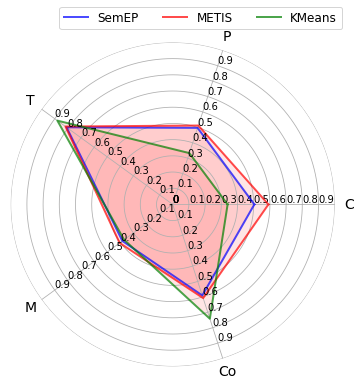

In [425]:
import numpy as np
import matplotlib.pyplot as plt

# Optionally use different styles for the graph
# Gallery: http://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html
# import matplotlib
# matplotlib.style.use('dark_background')  # interesting: 'bmh' / 'ggplot' / 'dark_background'


class Radar(object):
    def __init__(self, figure, title, labels, rect=None):
        if rect is None:
            rect = [0.05, 0.05, 0.9, 0.9]

        self.n = len(title)
        self.angles = np.arange(0, 360, 360.0/self.n)

        self.axes = [figure.add_axes(rect, projection='polar', label='axes%d' % i) for i in range(self.n)]

        self.ax = self.axes[0]
        self.ax.set_thetagrids(self.angles, labels=title, fontsize=14)

        for ax in self.axes[1:]:
            ax.patch.set_visible(False)
            ax.grid(False)
            ax.xaxis.set_visible(False)

        for ax, angle, label in zip(self.axes, self.angles, labels):
            ax.set_rgrids(range(0, 12), angle=angle, labels=label)
            ax.spines['polar'].set_visible(False)
            ax.set_ylim(0, 10)

    def plot(self, values, *args, **kw):
        angle = np.deg2rad(np.r_[self.angles, self.angles[0]])
        values = np.r_[values, values[0]]
        self.ax.plot(angle, values, *args, **kw)
        self.ax.fill(angle, values, 'r', alpha=0.1)


if __name__ == '__main__':
    fig = plt.figure(figsize=(5, 5))

    tit = ['C','P','T','M','Co']  # 12x

    lab = [
        ['0','0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9'],
        ['0','0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9'],
        ['0','0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9'],
        ['0','0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9'],
        ['0','0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9']
    ]

    radar = Radar(fig, tit, lab)
    radar.plot(cls_evaluation_TransD_th_85['semep'], linestyle='solid', linewidth=2, color='b', alpha=0.7, label='SemEP')
    radar.plot(cls_evaluation_TransD_th_85['metis'], linestyle='solid', linewidth=2, color='r', alpha=0.7, label='METIS')
    radar.plot(cls_evaluation_TransD_th_85['kmeans'], linestyle='solid', linewidth=2, color='g', alpha=0.7, label='KMeans')

    radar.ax.legend(loc = (0.15, 1.04), ncol=3, fontsize='large')
    fig.savefig("TransD-Threshold85_01.pdf", format='pdf', bbox_inches = 'tight')

In [1030]:
measure = cls_evaluation_TransD_th_85
array_semep = measure.iloc[0].tolist()[1:]
semep = [i * 10 for i in array_semep]
array_metis = measure.iloc[1].tolist()[1:]
metis = [i * 10 for i in array_metis]
array_kmeans = measure.iloc[2].tolist()[1:]
kmeans = [i * 10 for i in array_kmeans]
print(*[semep, metis, kmeans], sep='\n')

[4.43, 4.62, 8.25, 3.8, 6.21]
[5.88, 5.11, 8.16, 4.01, 6.02]
[5.739999999999999, 5.07, 8.17, 4.0200000000000005, 6.05]
